In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

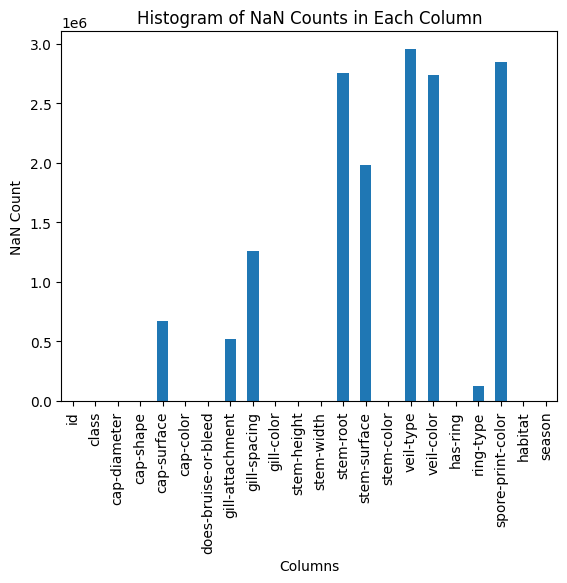

In [5]:
import matplotlib.pyplot as plt
nan_counts = df.isna().sum()

# Plotting
nan_counts.plot(kind='bar')
plt.title('Histogram of NaN Counts in Each Column')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.show()

In [6]:
df.drop_duplicates( keep='first', inplace=True)
df.reset_index(inplace=True,drop=True)
df.duplicated().value_counts()

False    3116945
Name: count, dtype: int64

In [7]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [8]:
cols = df_test.columns.tolist()
category_feature = df_test.select_dtypes('object').columns.tolist()
num_feature = df_test.select_dtypes(exclude='object').columns.tolist()

In [9]:
import numpy as np

In [10]:
%%time
for feature in cols:
    if feature in category_feature:
        dtype = pd.CategoricalDtype(categories=sorted(list(set(df[feature].dropna()) | set(df_test[feature].dropna()))),
                                    ordered=False)
        print(f"{feature:30} {len(dtype.categories)}")
    else:
        dtype = np.float32
    df[feature] = df[feature].astype(dtype)
    if True:
        df_test[feature] = df_test[feature].astype(dtype)

cap-shape                      108
cap-surface                    114
cap-color                      109
does-bruise-or-bleed           29
gill-attachment                117
gill-spacing                   66
gill-color                     86
stem-root                      45
stem-surface                   87
stem-color                     88
veil-type                      24
veil-color                     27
has-ring                       26
ring-type                      47
spore-print-color              43
habitat                        65
season                         4
CPU times: user 22.6 s, sys: 41 ms, total: 22.6 s
Wall time: 22.6 s


In [11]:
X = df.drop(['class'], axis=1)
y = df['class'].map({'p': 0, 'e': 1})

In [12]:
params = {
    'enable_categorical': True,
    'tree_method': 'hist',
    'n_estimators': 1696,
    'alpha': 4.956752183261538e-07,
    'subsample': 0.7349948172684168,
    'colsample_bytree': 0.30171411525842506,
    'max_depth': 15, 
    'min_child_weight': 6,
    'learning_rate': 0.013301072238797047,
    'gamma': 5.634602153104516e-08,
    'device': 'cuda',
    'num_parallel_tree': 4,
    'reg_lambda': 67,
}


In [13]:
from xgboost import XGBClassifier

In [14]:
clf = XGBClassifier(**params).fit(X, y)

In [15]:
df_test['class'] = clf.predict(df_test)
df_test.head()

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [06:24:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,3116945.0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,NaN,w,u,w,t,g,NaN,d,a,1
1,3116946.0,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,n,NaN,NaN,f,f,NaN,d,a,0
2,3116947.0,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,n,NaN,NaN,f,f,NaN,d,s,0
3,3116948.0,3.47,x,t,n,f,s,c,n,4.98,...,NaN,w,NaN,n,t,z,NaN,d,u,0
4,3116949.0,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,y,NaN,y,t,NaN,NaN,d,u,1


In [16]:
df_test['class'] = df_test['class'].map({0: 'p', 1: 'e'})
df_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,3116945.0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,NaN,w,u,w,t,g,NaN,d,a,e
1,3116946.0,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,n,NaN,NaN,f,f,NaN,d,a,p
2,3116947.0,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,n,NaN,NaN,f,f,NaN,d,s,p
3,3116948.0,3.47,x,t,n,f,s,c,n,4.98,...,NaN,w,NaN,n,t,z,NaN,d,u,p
4,3116949.0,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,y,NaN,y,t,NaN,NaN,d,u,e


In [19]:
len(df_test)

2077964

In [20]:
df_test[['id','class']].reset_index(drop=True).to_csv('submission.csv', index=False)